In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Use formula w=(x^t.x)^-1.x.y
def CalculateW(x,y):
    tmpCal=np.dot(x.T,x)
    tmpCal=np.linalg.inv(tmpCal)
   
    tmpCal1=np.dot(x.T,y)
    tmpCal=np.dot(tmpCal,tmpCal1)
    return tmpCal

#calculate mean squared error
def CalculateMeanSquaredError(x,y,w):
    size=x.shape[0]
    yi=np.dot(w,x.T)
    diff=np.subtract(y,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError

def PredictorFunc(w,x):
    tmpY=0
    sizew=w.shape[0]-1
    itr=0
    while sizew>= 0:
        tmpY=tmpY+w[sizew]*(x**sizew)
        sizew=sizew-1
        
    return tmpY

def polynomialFunc(w):
    function=""
    sizew=w.shape[0]-1
    itr=0
    while sizew>= 0:
        function=function+"+"+str(w[sizew])+"x^"+str(sizew)
        sizew=sizew-1
    function.strip('+')  
    return function

#plot scatter curve to show predicted and actual result
def plotPredictedAndActualResult(w,x_data,y_data,degree,error):
    
    plt.title('Plotting on Training data and comparing with Actual output')
    plt.scatter(x_data,y_data,s=20,c='blue',label ='Predicted Result')
    y=np.array([PredictorFunc(w,x) for x in x_data])   
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.scatter(x_data,y,s=20,c='red',label ='Actual Result')
    plt.legend( loc ="lower left")
#Plot curve
def plotCurve(w,x_train,y_train,degree,error):

    #Plot a curve to fit training data
    plt.figure(degree-2)
    plt.scatter(x_train,y_train,s=2,c='blue')
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    predict_y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Plotting on Training data')
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, predict_y, '-r')
    
    #Plot a curve to compare predicted result and actual result
    plt.figure(degree-1)
    plotPredictedAndActualResult(w,x_train,y_train,degree,error)
    
 #Plot curve for test data
def plotCurveOnTestData(w,x_test,y_test,degree):
    error=CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    plt.figure(degree)
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    
    y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Plotting on test data')
    plt.scatter(x_test,y_test,s=10,c='blue')
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    
    
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, y, '-r')
    
    plt.figure(degree+1)
    plotPredictedAndActualResult(w,x_test,y_test,degree,error)
      
#mean squared error for test data    
def CalculateMeanSquaredErrorTestData(x_test,y_test,w):
    size=x_test.shape[0]
    yi=np.array([PredictorFunc(w,x) for x in x_test])
    diff=np.subtract(y_test,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError

def ReadData():
    train_Data=pd.read_csv("linear_reg_train_data.csv")
    test_Data=pd.read_csv("linear_reg_test_data.csv")
    x_train=train_Data['x']
    y_train=train_Data['y']
    x_test=test_Data['x']
    y_test=test_Data['y']
    size=train_Data['x'].shape[0]
    return train_Data,test_Data,x_train,y_train,x_test,y_test,size
    


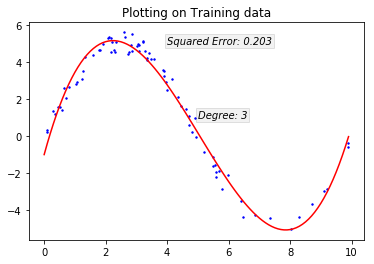

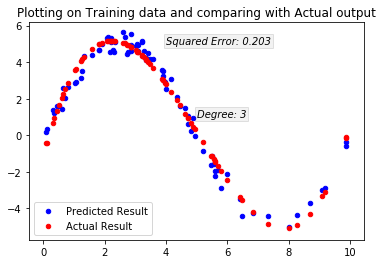

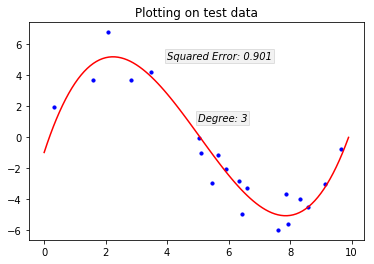

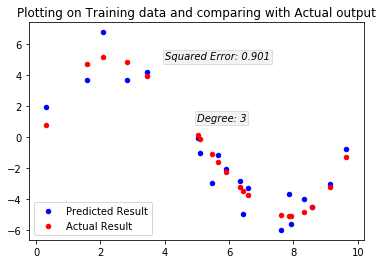

In [84]:
#Question 1.(a)
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size=ReadData()

#Read data for x
size=train_Data['x'].shape[0]
x=np.ones((size,1))

#read data for Y
train_y=np.array(train_Data['y'])

MAX_DEGREE=size
degree=1;
oldError=100
while degree<MAX_DEGREE:
    x1=np.array(train_Data['x'])**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    w=CalculateW(x,y_train)
    newerror=CalculateMeanSquaredError(x,train_y,w)
    testerror= CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    
    #If performance of model degrades come out of the loop
    #Also consider a model as good if error percentage less then 0.15
   
    if( testerror<=1 ):       
        plotCurve(w,x_train,y_train,degree,newerror) 
      
        plotCurveOnTestData(w,x_test,y_test,degree) 
        break;
   
    degree=degree+1


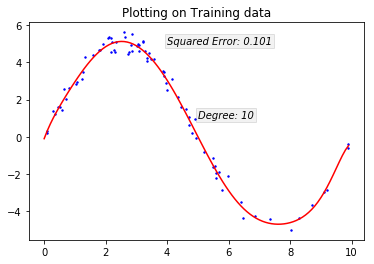

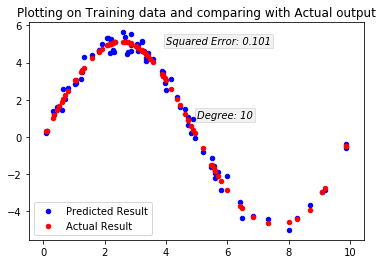

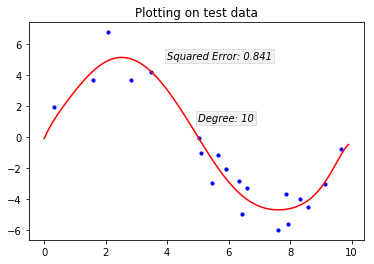

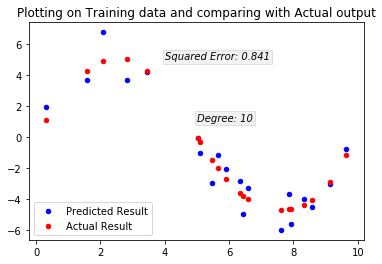

In [85]:
#Question 1.(b)  
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size=ReadData()

#Read data for x
x=np.ones((size,1))

#read data for Y
train_y=np.array(train_Data['y'])

MAX_DEGREE=size

degree=1;
SquaredError=100
w_calculated=None
degree_Polynomial=1;
while degree<100:
    x1=np.array(train_Data['x'])**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    w=CalculateW(x,y_train)
    newerror=CalculateMeanSquaredError(x,train_y,w)
   # testerror= CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    
   
    #If performance of model degrades come out of the loop
    #Also consider a model as good if error percentage less then 0.15
    if(newerror<SquaredError ):
       
        w_calculated=w
        degree_Polynomial=degree
        SquaredError=newerror
       
        
        
    degree=degree+1
#plot over fitting curve

plotCurve(w_calculated,x_train,y_train,degree_Polynomial,SquaredError) 
plotCurveOnTestData(w_calculated,x_test,y_test,degree_Polynomial) 

#Now use ridge regression